# Comprehensive Comparison of Portfolio Optimization and Stock Return Predictions using Random Forest
# NIFTY50 Index 

In [240]:
import pandas as pd
from pandas_datareader import data as pdr
from numpy import log as ln
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sco
import yfinance as yf
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [241]:
tickers = ["CIPLA.NS",
"NTPC.NS",
"ULTRACEMCO.NS",
"ADANIENT.NS",
"TATACONSUM.NS",
"HINDALCO.NS",
"KOTAKBANK.NS",
"RELIANCE.NS",
"ONGC.NS",
"INDUSINDBK.NS",
"BRITANNIA.NS",
"HDFCLIFE.NS",
"COALINDIA.NS",
"LTIM.NS",
"HEROMOTOCO.NS",
"LT.NS",
"TCS.NS",
"NESTLEIND.NS",
"TITAN.NS",
"TECHM.NS",
"TATASTEEL.NS",
"ITC.NS",
"APOLLOHOSP.NS",
"BAJAJFINSV.NS",
"BHARTIARTL.NS",
"WIPRO.NS",
"BAJAJ-AUTO.NS",
"MARUTI.NS",
"BAJFINANCE.NS"]

risk_free = 0.007

In [242]:
stock_data = yf.download(tickers, '2009-04-01', '2024-03-30')
stock_data.reset_index(inplace=True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'].dt.date).copy()
stock_data.set_index('Date',inplace=True)
stockData = stock_data['Adj Close']
stockData = stockData.resample('M').last()
stockData

[*********************100%%**********************]  29 of 29 completed


Ticker,ADANIENT.NS,APOLLOHOSP.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,HDFCLIFE.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2009-04-30,26.580746,176.808273,216.574783,21.043619,7.974280,316.692047,130.271393,222.315247,NaN,NaN,...,96.497650,75.550659,368.238403,55.675667,15.235558,116.784515,63.765652,34.380619,553.660767,64.367371
2009-05-31,42.407932,236.251984,349.088226,35.104851,12.221354,344.791168,139.516037,205.739746,NaN,NaN,...,109.397865,102.153870,462.159332,55.687714,25.937561,132.271942,92.109184,49.393372,673.589355,74.367317
2009-06-30,51.540436,264.404755,338.557373,38.171703,13.668273,336.915833,133.076035,233.950500,NaN,NaN,...,99.062447,93.246811,411.608459,57.937233,24.996933,147.316940,142.369095,54.033932,647.126221,74.304153
2009-07-31,52.153046,255.958893,421.564636,32.805153,16.970434,345.345520,155.881653,253.988861,NaN,NaN,...,109.499420,101.699547,397.775635,68.365372,30.706713,199.570358,164.936966,56.831409,755.016846,96.362427
2009-08-31,45.312527,245.305222,419.476990,27.008039,18.210976,357.556000,138.798309,251.952194,NaN,NaN,...,107.848816,103.573608,407.885773,77.422302,28.176319,199.987717,184.519775,57.084450,719.864624,108.118988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,2358.550049,5523.967285,6090.549805,1673.500000,7121.899902,1014.700012,4852.649902,1212.300049,338.253479,690.750000,...,259.550720,192.137878,2377.449951,940.750000,127.900002,3471.514160,1220.949951,3490.600098,9003.650391,412.170959
2023-12-31,2848.949951,5698.958984,6797.250000,1685.800049,7327.750000,1032.199951,5338.450195,1246.300049,371.717987,646.700012,...,309.067017,202.092194,2584.949951,1086.800049,139.600006,3775.903564,1272.650024,3675.449951,10503.049805,470.296997
2024-01-31,3142.000000,6347.224609,7667.549805,1627.300049,6862.899902,1170.699951,5198.399902,1351.000000,401.524628,576.599976,...,315.374512,248.611343,2853.250000,1118.000000,135.949997,3815.949951,1333.650024,3697.550049,10167.349609,478.149994


In [243]:
retData = np.log(stockData/stockData.shift(1))
retData = retData.dropna()

retData

Ticker,ADANIENT.NS,APOLLOHOSP.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,HDFCLIFE.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-31,0.126386,0.085293,0.008465,0.003121,0.017022,0.064734,-0.022332,0.012568,-0.047712,0.041834,...,-0.023176,0.077463,-0.000543,0.097177,0.053639,0.024054,0.029802,0.046817,0.027405,0.073778
2018-01-31,0.248137,-0.035483,0.001064,-0.083302,-0.045924,-0.179316,-0.005344,-0.027237,0.130317,0.100947,...,-0.038882,0.041396,0.042772,-0.084887,0.010359,0.144050,0.195119,0.013197,0.014111,-0.027602
2018-02-28,-0.046319,0.034029,-0.099662,0.048539,-0.022665,-0.026026,0.064103,-0.004231,0.031545,0.077048,...,-0.025332,-0.077384,-0.007047,-0.053532,-0.048606,-0.025150,0.000000,-0.063378,-0.053048,-0.039838
2018-03-31,-0.263495,-0.122214,-0.095784,0.023447,0.074746,-0.072198,-0.004747,-0.077918,-0.029863,-0.014744,...,0.038750,-0.045063,-0.078255,-0.062725,-0.162186,-0.063207,0.041641,0.143726,-0.050741,-0.040601
2018-04-30,0.053333,0.024448,0.073014,0.058407,0.076304,0.026850,0.103605,0.107576,0.005983,0.130984,...,0.014334,0.015349,0.087380,0.139720,0.041001,0.214872,0.048738,0.041064,0.039428,-0.008573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,0.027467,0.137245,0.136384,0.064128,-0.050748,0.104080,0.091916,0.010198,0.129904,0.110723,...,0.112295,0.075683,0.038394,0.043727,0.074228,0.034672,0.085351,0.090163,0.066753,0.078672
2023-12-31,0.188903,0.031187,0.109780,0.007323,0.028494,0.017099,0.095410,0.027660,0.094340,-0.065895,...,0.174606,0.050511,0.083678,0.144315,0.087533,0.084049,0.041472,0.051602,0.154036,0.131926
2024-01-31,0.097909,0.107734,0.120479,-0.035318,-0.065538,0.125909,-0.026585,0.080666,0.077133,-0.114734,...,0.020203,0.207167,0.098753,0.028304,-0.026494,0.010550,0.046818,0.005995,-0.032484,0.016560


### Portfolio Simulation - Equal weights 

#### Mean, Standard Deviation, and Covariance

In [244]:
retMean = retData.mean()
retStd = retData.std()
retCov = retData.cov()
retCorr = retData.corr()

print(f"Means:\n {retMean}")
print(f"Standard Deviations:\n {retStd}")
print(f"Covariance Matrix:\n {retCov}")

Means:
 Ticker
ADANIENT.NS      0.048744
APOLLOHOSP.NS    0.023262
BAJAJ-AUTO.NS    0.015860
BAJAJFINSV.NS    0.015139
BAJFINANCE.NS    0.019068
BHARTIARTL.NS    0.013737
BRITANNIA.NS     0.010648
CIPLA.NS         0.012426
COALINDIA.NS     0.013591
HDFCLIFE.NS      0.007244
HEROMOTOCO.NS    0.005776
HINDALCO.NS      0.011652
INDUSINDBK.NS   -0.000406
ITC.NS           0.009682
KOTAKBANK.NS     0.007663
LT.NS            0.016092
LTIM.NS          0.021885
MARUTI.NS        0.005737
NESTLEIND.NS     0.017322
NTPC.NS          0.014153
ONGC.NS          0.009996
RELIANCE.NS      0.016939
TATACONSUM.NS    0.018318
TATASTEEL.NS     0.013593
TCS.NS           0.015872
TECHM.NS         0.014634
TITAN.NS         0.020489
ULTRACEMCO.NS    0.011378
WIPRO.NS         0.010686
dtype: float64
Standard Deviations:
 Ticker
ADANIENT.NS      0.185913
APOLLOHOSP.NS    0.109578
BAJAJ-AUTO.NS    0.080413
BAJAJFINSV.NS    0.132786
BAJFINANCE.NS    0.133309
BHARTIARTL.NS    0.074011
BRITANNIA.NS     0.064297
CIPLA

#### Simulation

In [245]:
np.random.seed(38)
num_simulations = 5000
nStocks = len(retCov.columns)

all_weights = np.ones((num_simulations, nStocks))
mn_arr = np.zeros(num_simulations)
vol_arr = np.zeros(num_simulations)

for x in range(num_simulations):
    weights = np.random.uniform(0, 1, nStocks)    
    weights = weights / np.sum(weights)
    all_weights[x, :] = weights 
    # We use matrix algebra formulae
    mn_arr[x] = np.sum((retMeans * weights))
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(retCov, weights)))

print(np.c_[mn_arr, vol_arr])

[[0.01474146 0.05710059]
 [0.01542085 0.06099781]
 [0.01411998 0.05914993]
 ...
 [0.015107   0.06085435]
 [0.01489932 0.05467406]
 [0.015037   0.05397646]]


In [246]:

def get_sharpe(weights):
    weights = np.array(weights)
    mean = np.sum(retMean * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(retCov, weights)))
    sharpe = (mean-risk_free)/ vol
    return sharpe

def comp_neg_mean(weights):
    return -(np.sum(retMean * weights))

def comp_pos_mean(weights):
    return np.sum(retMean * weights)

def comp_std(weights):
    return np.sqrt(np.dot(weights.T, np.dot(retCov, weights)))

def comp_pos_sharpe(weights):
    return get_sharpe(weights)

def comp_neg_sharpe(weights):
    return -get_sharpe(weights)

def check_sum(weights):
    return np.sum(weights) - 1

### Minimum Variance Portfolio

In [247]:
nStocks = len(retCov.columns)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})

bounds = tuple((0, 1) for stock in range(nStocks))

initialGuess = np.repeat(1. / nStocks, nStocks)

optResults = sco.minimize(comp_std, initialGuess, method='SLSQP', bounds=bounds, constraints=constraints)

min_var_weights = optResults.x
min_var_mean = comp_pos_mean(min_var_weights)
min_var_std = comp_std(min_var_weights)

print(f"Constraints: \n{constraints} \n")

print(f"Bounds: \n{bounds} \n")

print(f"Initial Guess Values: \n{initialGuess} \n")

print('')

print('MinVar Minimization Stats\n-------------------------------------------------------\n')
print(f"Expected Return: {round(min_var_mean*100,4)}%\n"\
      f"Volatility: {round(min_var_std*100,4)}%\n")
print('')

Constraints: 
{'type': 'eq', 'fun': <function <lambda> at 0x000001F80587C9A0>} 

Bounds: 
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)) 

Initial Guess Values: 
[0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276] 


MinVar Minimization Stats
-------------------------------------------------------

Expected Return: 1.3855%
Volatility: 3.6098%




# MV Returns: 1.38%

### Minimizing Sharp Ratio

In [248]:
constraints = ({'type': 'eq', 'fun': check_sum})
optResults = sco.minimize(comp_neg_sharpe, initialGuess, method='SLSQP', bounds=bounds, constraints=constraints)

sharpe_weights = optResults.x
sharpe_mean = comp_pos_mean(sharpe_weights)
sharpe_std = comp_std(sharpe_weights)
sharpe_sharpe = comp_pos_sharpe(sharpe_weights)

print('Sharpe Ratio Maximization Stats\n-------------------------------------------------------\n')
print(f"Expected Return: {round(sharpe_mean*100,4)}%\n"\
      f"Volatility: {round(sharpe_std*100,4)}%\n"\
      f"Sharpe Ratio: {round(sharpe_sharpe,4)}")

print('')


Sharpe Ratio Maximization Stats
-------------------------------------------------------

Expected Return: 2.3167%
Volatility: 5.5082%
Sharpe Ratio: 0.2935



# MSharp Returns of 2.3%

In [249]:
frontier_min = min_var_std
frontier_bottom_max = sharpe_std
frontier_top_max = sharpe_std * 1.4

# Actual X values
frontier_x_top = np.linspace(frontier_min, frontier_top_max)
frontier_x_bottom = np.linspace(frontier_min, frontier_bottom_max)

# Maximize mean - The efficient upper part of the frontier
# Vertical - Returns
frontier_y_top = []
for possible_vol in frontier_x_top:
    constraints = ({'type': 'eq', 'fun': check_sum}, 
                   {'type': 'eq', 'fun': lambda w: comp_std(w) - possible_vol})
                   # Vol of portfolio - possible vol should equal zero
    optResult = sco.minimize(comp_neg_mean, initialGuess, method='SLSQP', bounds=bounds, constraints=constraints)
    frontier_y_top.append(-optResult['fun'])

# Minimize mean - The inefficient bottom part of the frontier
# Volatility - Horizontal
frontier_y_bottom = []
for possible_vol in frontier_x_bottom:
    constraints = ({'type': 'eq', 'fun': check_sum},
                   {'type': 'eq', 'fun': lambda w: comp_std(w) - possible_vol})
                   # Vol of portfolio - possible vol should equal zero
    optResult = sco.minimize(comp_pos_mean, initialGuess, method='SLSQP', bounds=bounds, constraints=constraints)
    frontier_y_bottom.append(optResult['fun'])

In [250]:
# PLACE CODE HERE #
weightsSharpe = np.linspace(0, 2, 29)
cml_y = []
cml_x = []
for weightSharpe in weightsSharpe:
    cml_x.append(weightSharpe*sharpe_std)
    cml_y.append(weightSharpe*sharpe_mean+(1-weightSharpe)*risk_free)

print('CML')
print(np.c_[weightsSharpe, cml_y, cml_x])

CML
[[0.         0.007      0.        ]
 [0.07142857 0.0081548  0.00393442]
 [0.14285714 0.00930959 0.00786885]
 [0.21428571 0.01046439 0.01180327]
 [0.28571429 0.01161918 0.0157377 ]
 [0.35714286 0.01277398 0.01967212]
 [0.42857143 0.01392877 0.02360655]
 [0.5        0.01508357 0.02754097]
 [0.57142857 0.01623837 0.03147539]
 [0.64285714 0.01739316 0.03540982]
 [0.71428571 0.01854796 0.03934424]
 [0.78571429 0.01970275 0.04327867]
 [0.85714286 0.02085755 0.04721309]
 [0.92857143 0.02201234 0.05114752]
 [1.         0.02316714 0.05508194]
 [1.07142857 0.02432193 0.05901636]
 [1.14285714 0.02547673 0.06295079]
 [1.21428571 0.02663153 0.06688521]
 [1.28571429 0.02778632 0.07081964]
 [1.35714286 0.02894112 0.07475406]
 [1.42857143 0.03009591 0.07868849]
 [1.5        0.03125071 0.08262291]
 [1.57142857 0.0324055  0.08655733]
 [1.64285714 0.0335603  0.09049176]
 [1.71428571 0.0347151  0.09442618]
 [1.78571429 0.03586989 0.09836061]
 [1.85714286 0.03702469 0.10229503]
 [1.92857143 0.03817948 

C:\Users\sachi\AppData\Local\Temp\ipykernel_30192\2909394772.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(retStd, retMean, cmap='cividis')


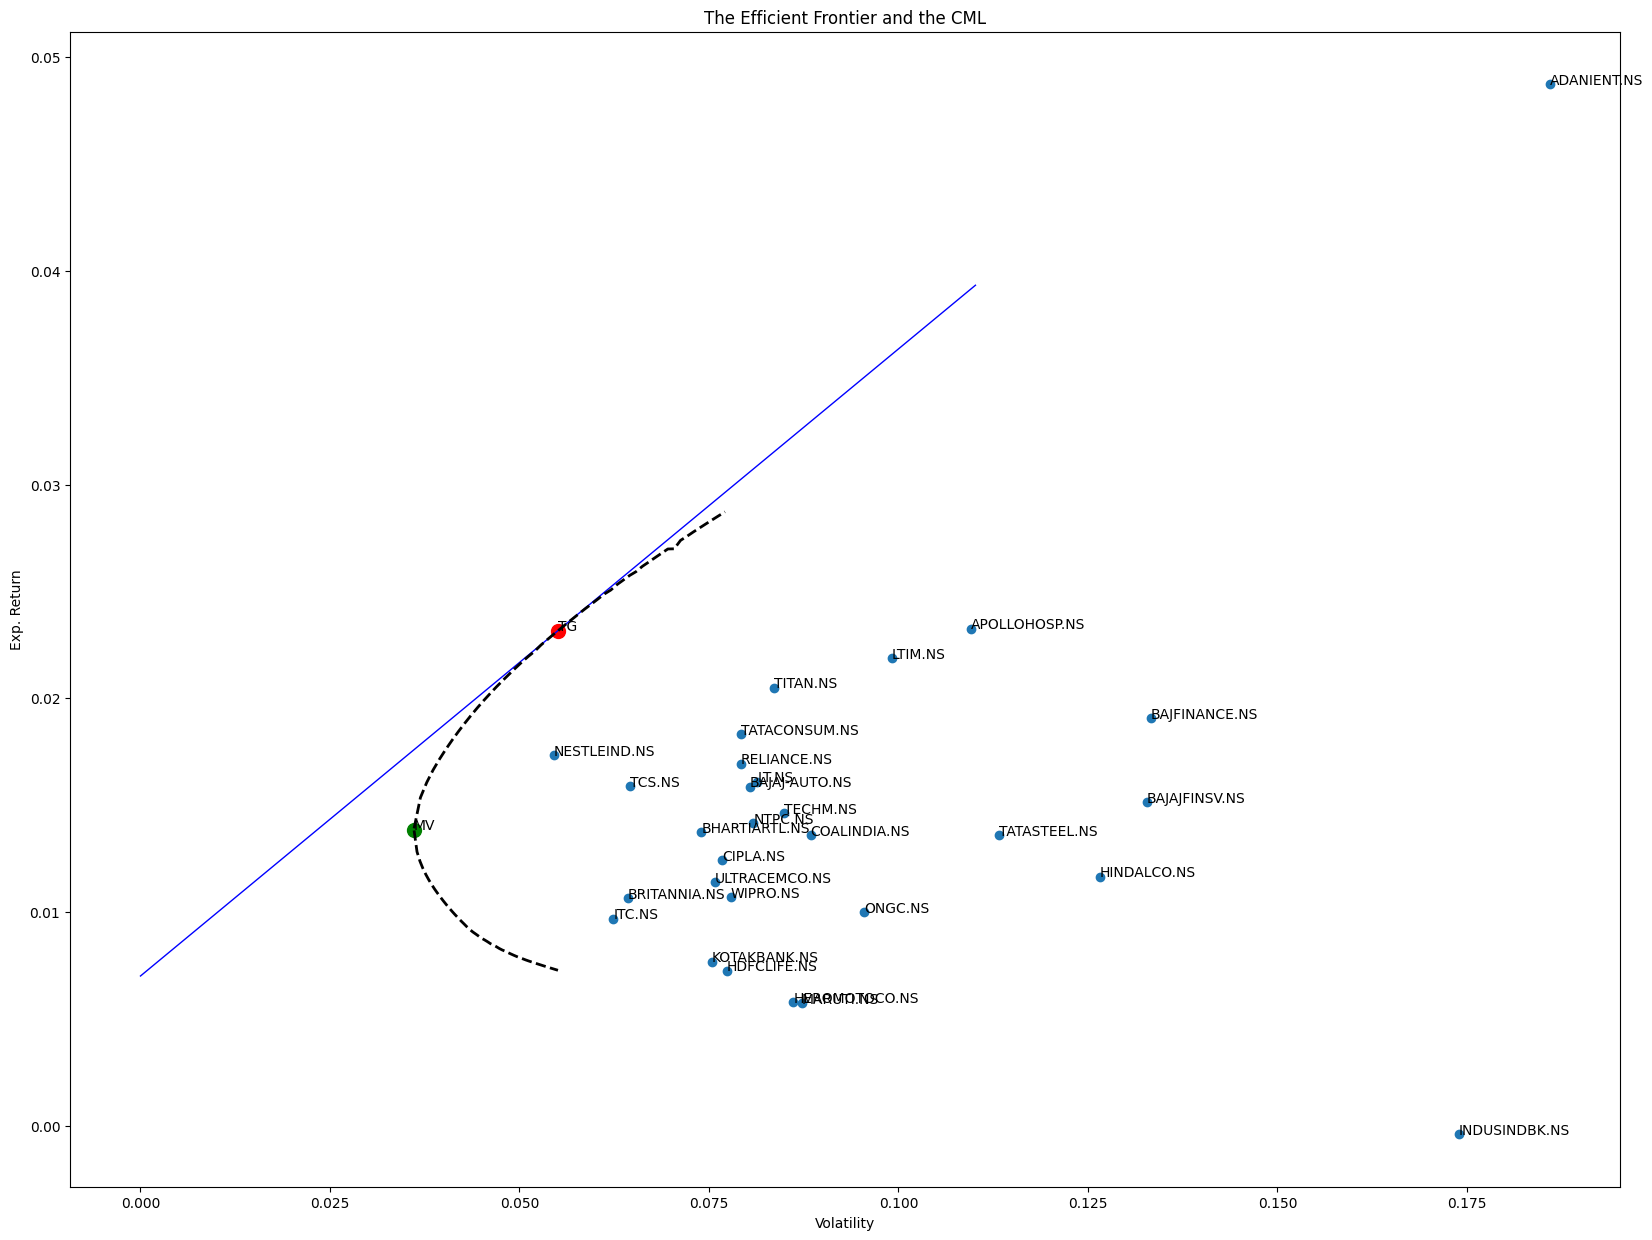

In [252]:
# PLACE CODE HERE
plt.figure(figsize=(20,15))
# plt.ylim(-.01, 0.025)
# plt.xlim(0, .14)
plt.title('The Efficient Frontier and the CML')
plt.xlabel('Volatility')
plt.ylabel('Exp. Return')
plt.scatter(sharpe_std, sharpe_mean, c='red', s=100) 
plt.annotate("TG", (sharpe_std, sharpe_mean))
plt.scatter(min_var_std, min_var_mean, c='green', s=100) 
plt.annotate("MV", (min_var_std, min_var_mean))
plt.scatter(retStd, retMean, cmap='cividis')
labels=(list(stockData.columns))
for i, txt in enumerate(labels):
    plt.annotate(txt, (retStd[i], retMean[i]))
plt.plot(cml_x,cml_y, 'b-', linewidth=1)
plt.plot(frontier_x_top,frontier_y_top, 'k--', linewidth=2)
plt.plot(frontier_x_bottom,frontier_y_bottom, 'k--', linewidth=2)
plt.show()

## Tangent Portfolio

In [253]:
tangent_portfolio = pd.DataFrame({
    "Ticker": tickers,
    "Weights": sharpe_weights
})

print("Total Weights:", sharpe_weights.sum())
tangent_portfolio = tangent_portfolio.sort_values(by="Weights", ascending=False)
tangent_portfolio

Total Weights: 1.0000000000000009


,Ticker,Weights
18,TITAN.NS,4.670727e-01
0,CIPLA.NS,1.712738e-01
24,BHARTIARTL.NS,1.242813e-01
16,TCS.NS,1.034049e-01
1,NTPC.NS,6.424844e-02
5,HINDALCO.NS,3.282104e-02
8,ONGC.NS,2.199949e-02
19,TECHM.NS,9.062556e-03
26,BAJAJ-AUTO.NS,5.835689e-03
10,BRITANNIA.NS,9.218260e-17


# NIFTY 50 Index 

In [254]:
nifty50 = pd.read_csv("NIFTY 50_Historical_PR.csv")
nifty50 = nifty50[['Date', 'Close']]
nifty50['Date'] = pd.to_datetime(nifty50['Date']).dt.date.copy()
nifty50['Date'] = pd.to_datetime(nifty50['Date']).dt.normalize()

nifty50.set_index('Date',inplace=True)
nifty50

,Close
Date,
2024-03-28,22326.90
2024-03-27,22123.65
2024-03-26,22004.70
2024-03-22,22096.75
2024-03-21,22011.95
...,...
2014-04-07,6695.05
2014-04-04,6694.35
2014-04-03,6736.10


In [255]:
nifty50PE = pd.read_csv("NIFTY 50_Historical_PE_PB_DIV_Data.csv")
nifty50PE['Date'] = pd.to_datetime(nifty50PE['Date']).dt.date.copy()
nifty50PE['Date'] = pd.to_datetime(nifty50PE['Date']).dt.normalize()

nifty50PE.set_index('Date',inplace=True)
nifty50PE = nifty50PE[["P/E", "P/B", "Div Yield %"]]
nifty50PE

,P/E,P/B,Div Yield %
Date,,,
2024-03-28,22.88,3.94,1.20
2024-03-27,22.84,3.90,1.21
2024-03-26,22.72,3.87,1.22
2024-03-22,22.81,3.89,1.21
2024-03-21,22.73,3.88,1.22
...,...,...,...
2014-04-07,18.84,3.23,1.37
2014-04-04,18.84,3.23,1.37
2014-04-03,18.95,3.25,1.37


In [256]:
nifty50 = nifty50.join(nifty50PE)
nifty50

,Close,P/E,P/B,Div Yield %
Date,,,,
2024-03-28,22326.90,22.88,3.94,1.20
2024-03-27,22123.65,22.84,3.90,1.21
2024-03-26,22004.70,22.72,3.87,1.22
2024-03-22,22096.75,22.81,3.89,1.21
2024-03-21,22011.95,22.73,3.88,1.22
...,...,...,...,...
2014-04-07,6695.05,18.84,3.23,1.37
2014-04-04,6694.35,18.84,3.23,1.37
2014-04-03,6736.10,18.95,3.25,1.37


  ### Simple Prediction of Nifty 50

<Axes: >

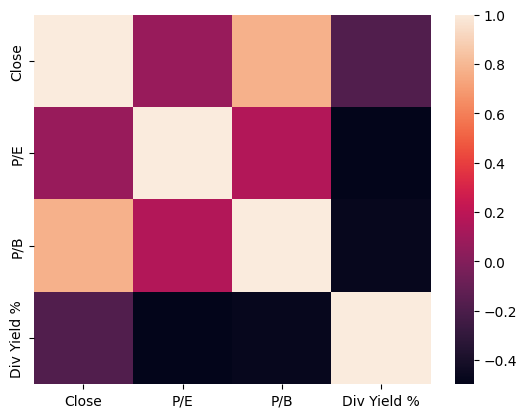

In [257]:
sns.heatmap(nifty50.corr())

# Predicting Index Returns - Long position, One time Investment 
## Ivestment Period - 2022 April to 2024 April

In [258]:

nifty50_covidless = nifty50[nifty50.index.year != 2020]

X_train = nifty50.drop('Close', axis=1).loc[:"2022-03-31"]
X_test = nifty50.drop('Close', axis=1).loc["2022-04-01":]
y_train = nifty50['Close'].loc[:"2022-03-31"]
y_test = nifty50['Close'].loc["2022-04-01":]


rf = RandomForestRegressor(n_estimators=100, 
                            random_state =47, 
                            max_depth = 25, 
                            max_features = 1.0,
                            bootstrap = True,
                            max_samples = 0.9
                            )
rf_model = rf.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

forest_mse = mean_squared_error(y_test, rf_pred)
forest_rmse = np.sqrt(forest_mse)
print("RandomForest RMSE = ", forest_rmse)
print("RandomForest R2 = ", r2_score(y_test, rf_pred))


RandomForest RMSE =  5366.290169797248
RandomForest R2 =  -8.44914765194841


## Predicted Return: -6%
## Actual Return: 27.83%

Actual Return in 2024: 4862.1500000000015
Predicted Return in 2024: -1178.1463333333359

Actual Percentage Change: 27.839791580182947 %
Predicted Percentage Change: -6.745852836904828 %


<Axes: xlabel='Date'>

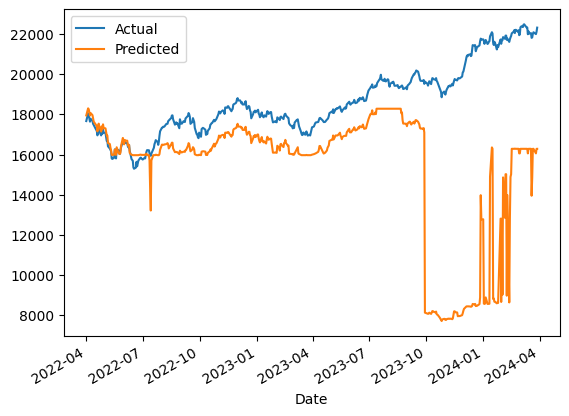

In [259]:
data = {"Actual": y_test,
       "Predicted": rf_pred}
test_df = pd.DataFrame(data)

print("Actual Return in 2024:", y_test[0] - y_train[0])
print("Predicted Return in 2024:", rf_pred[0] - y_train[0])

print()

print(f"Actual Percentage Change: {100*(y_test[0] - y_train[0])/y_train[0]} %")
print(f"Predicted Percentage Change: {100*(rf_pred[0] - y_train[0])/y_train[0]} %")
test_df.plot()

# Predicting Index Returns - Monthly Trading - Cumulative Returns over 2022-24

In [260]:

nifty50_covidless = nifty50[nifty50.index.year != 2020]


niftyRet = nifty50.copy()
niftyRet = niftyRet.resample('M').last()
niftyRet['Close'] = np.log(niftyRet['Close']/niftyRet['Close'].shift(1))
niftyRet = niftyRet.dropna()


X_train = niftyRet.drop('Close', axis=1).loc[:"2022-03-31"]
X_test = niftyRet.drop('Close', axis=1).loc["2022-04-01":]
y_train = niftyRet['Close'].loc[:"2022-03-31"]
y_test = niftyRet['Close'].loc["2022-04-01":]
# selection_model = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear',random_state=47))
# selection_model.fit(X_train,y_train)
# X_train_reg = X_train[X_train.columns[selection_model.get_support()]].copy()
# X_test_reg = X_test[X_test.columns[selection_model.get_support()]].copy()

rf = RandomForestRegressor(n_estimators=100, 
                            random_state =47, 
                            max_depth = 25, 
                            max_features = 1.0,
                            bootstrap = True,
                            max_samples = 0.9
                            )
rf_model = rf.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

forest_mse = mean_squared_error(y_test, rf_pred)
forest_rmse = np.sqrt(forest_mse)
print("RandomForest RMSE = ", forest_rmse)
print("RandomForest R2 = ", r2_score(y_test, rf_pred))


RandomForest RMSE =  0.040383574715954725
RandomForest R2 =  -0.18779031179422345


## Predicted Returns: 15.72%
## Actual Returns: 28.73%

In [261]:
data = {"Actual": y_test,
       "Predicted": rf_pred,
       "Close": nifty50['Close'].resample('M').last().dropna().loc["2022-04-04":]}
test_df = pd.DataFrame(data)
print("Actual Returns: ", np.sum(test_df['Actual']*test_df['Close']))
print("Predicted Returns: ", np.sum(test_df['Predicted']*test_df['Close']))
print()
base = nifty50['Close'].loc["2022-04-04"]
print(f"Actual Percentage Change: {100*np.sum(test_df['Actual']*test_df['Close'])/base} %")
print(f"Predicted Percentage Change: {100*np.sum(test_df['Predicted']*test_df['Close'])/base} %")

Actual Returns:  5188.002435350352
Predicted Returns:  2838.341347149012

Actual Percentage Change: 28.73698270326006 %
Predicted Percentage Change: 15.721921339742165 %


<Axes: xlabel='Date'>

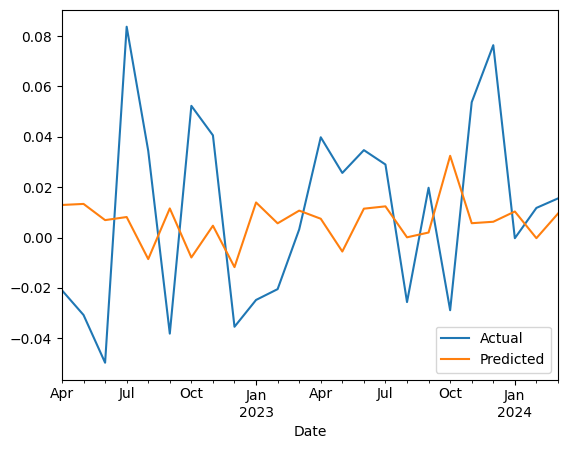

In [262]:
test_df[['Actual', 'Predicted']].plot()
# plt.plot(nifty50['Close'], label='Actual')

# Predicting the Tangent Portfolio Returns

In [263]:
actual = []
predicted = []
for ticker in tangent_portfolio['Ticker']:
    X_train = niftyRet.loc["2017-12-30":"2022-03-31"]
    X_test = niftyRet.loc["2022-04-01":]
    y_train = retData[ticker].loc[:"2022-03-31"]
    y_test = retData[ticker].loc["2022-04-01":]
    
    rf = RandomForestRegressor(n_estimators=100, 
                            random_state =47, 
                            max_depth = 25, 
                            max_features = 1.0,
                            bootstrap = True,
                            max_samples = 0.9
                            )
    rf_model = rf.fit(X_train,y_train)
    rf_pred = rf_model.predict(X_test)
    data = {"Actual": y_test,
       "Predicted": rf_pred,
       "Close": stockData[ticker].dropna().loc["2022-04-04":]}
    test_df = pd.DataFrame(data)
    actual.append(y_test[0])
    predicted.append(rf_pred[0])


In [264]:
tangent_portfolio["Actual"] = np.exp(actual) - 1
tangent_portfolio["Predicted"] = np.exp(predicted) - 1
tangent_portfolio

,Ticker,Weights,Actual,Predicted
18,TITAN.NS,4.670727e-01,-0.030736,-0.014508
0,CIPLA.NS,1.712738e-01,-0.036197,0.066760
24,BHARTIARTL.NS,1.242813e-01,-0.021127,0.050910
16,TCS.NS,1.034049e-01,-0.051672,0.001036
1,NTPC.NS,6.424844e-02,0.157037,0.002762
5,HINDALCO.NS,3.282104e-02,-0.152502,0.041157
8,ONGC.NS,2.199949e-02,-0.021049,-0.013065
19,TECHM.NS,9.062556e-03,-0.160359,-0.007366
26,BAJAJ-AUTO.NS,5.835689e-03,0.020955,0.048542
10,BRITANNIA.NS,9.218260e-17,0.022720,-0.028759


## Predicted Returns: 1.25%
## Actual Returns: -2.52%
#### Tangent Portfolio

In [265]:
weighted_actual = np.sum(tangent_portfolio["Weights"] * tangent_portfolio["Actual"])*100
weighted_predict = np.sum(tangent_portfolio["Weights"] * tangent_portfolio["Predicted"])*100

print(f"Weighted Actual Percentage Return: {weighted_actual}%")
print(f"Weighted Prediction Percentage Return: {weighted_predict}%")

Weighted Actual Percentage Return: -2.5234015232198987%
Weighted Prediction Percentage Return: 1.2549464121799765%


# Monkey Portfolio 
### Random Stocks and Random Weights

In [279]:
monkey_portfolio = tangent_portfolio.sample(n=10)
random_weights = np.random.random(10)
random_weights /= random_weights.sum()

monkey_portfolio["Weights"] = random_weights
monkey_actual = np.sum(monkey_portfolio['Actual'] * monkey_portfolio['Weights'])*100
monkey_predicted = np.sum(monkey_portfolio['Predicted'] * monkey_portfolio['Weights'])*100
print(f"Monkey's Actual Percentage Returns: {monkey_actual} %")
print(f"Monkey's Predicted Percentage Returns: {monkey_predicted} %")


Monkey's Actual Percentage Returns: 3.0095761115572968 %
Monkey's Predicted Percentage Returns: 1.017504122084622 %


## Monkeys' Predicted: -1 to 2%
## Monkeys' Actual: -2 to 3%